In [1]:
print("Nettoyage des données:")

Nettoyage des données:


In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("donnees_clients.csv")

In [5]:
print(df.head())

   ID client   âge     sexe  revenu annuel  score de dépenses
0          1    20     Male          20000                 35
1          2    35   Female          40000                 67
2          3    25   Female          32000                 52
3          4    30     Male          45000                 75
4          5    50     Male          70000                 82


In [8]:
# Pour les colonnes numériques
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Pour les colonnes catégorielles
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [9]:
df.drop_duplicates(inplace=True)

In [11]:
# Pour les colonnes numériques
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Filtrer les valeurs aberrantes
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]


In [12]:
print(IQR)

29.5


In [13]:
import matplotlib.pyplot as plt

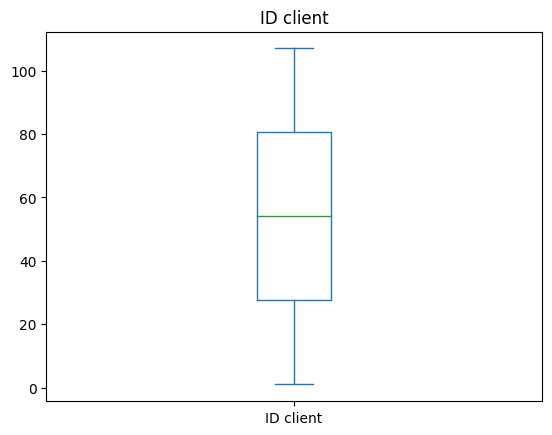

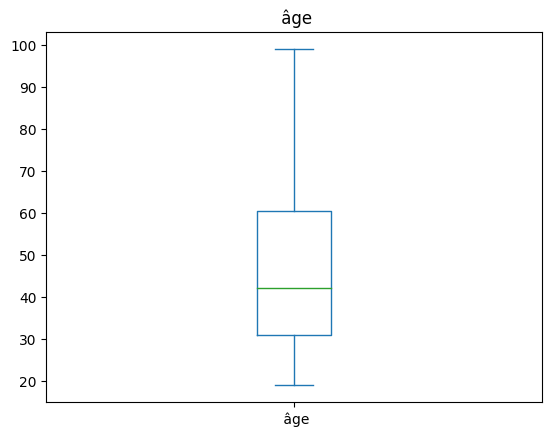

In [14]:
# Pour chaque colonne numérique
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure()
    df[col].plot(kind='box')
    plt.title(col)


In [15]:
print("Normalisation des données:")


Normalisation des données:


In [18]:
print(df.columns)


Index(['ID client', ' âge', ' sexe', ' revenu annuel', ' score de dépenses'], dtype='object')


In [20]:
df.columns = df.columns.str.strip()


In [24]:

df = df.replace(r'^\s*$', np.nan, regex=True)

for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].mean(), inplace=True)


for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


cols_to_normalize = ['âge', 'revenu annuel', 'score de dépenses']

# Normalisation Min-Max
scaler = MinMaxScaler()
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# la standardisation Min-Max
scaler = StandardScaler()
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])


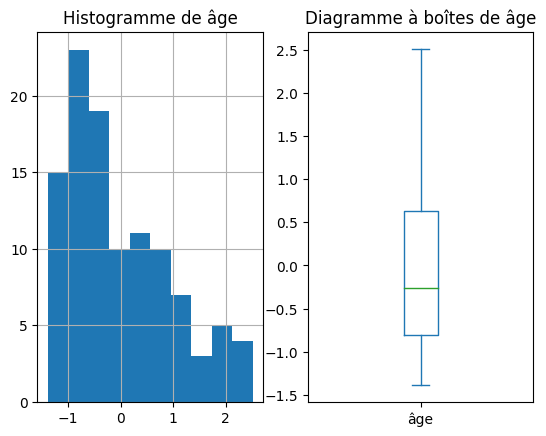

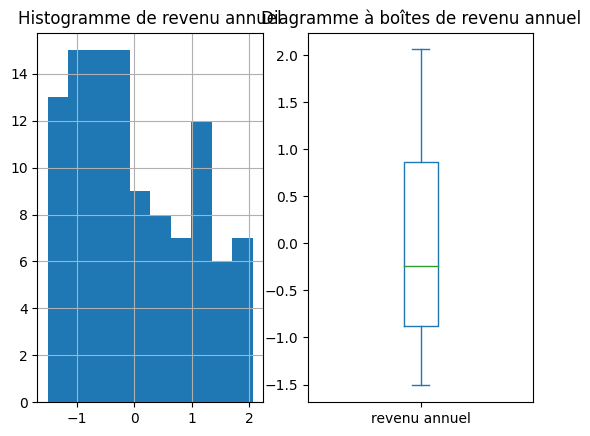

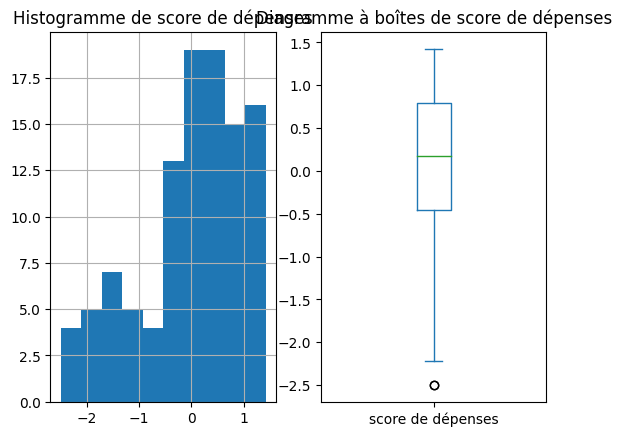

In [27]:
import matplotlib.pyplot as plt

cols_to_normalize = ['âge', 'revenu annuel', 'score de dépenses']

# Pour chaque colonne normalisée
for col in cols_to_normalize:
    plt.figure()

    plt.subplot(1, 2, 1)
    df[col].hist()
    plt.title(f'Histogramme de {col}')

    plt.subplot(1, 2, 2)
    df[col].plot(kind='box')
    plt.title(f'Diagramme à boîtes de {col}')

    plt.show()


In [28]:
print("Implémentation de l&#39;algorithme K-Means:")

Implémentation de l&#39;algorithme K-Means:


In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [31]:
df = pd.get_dummies(df)


In [32]:
kmeans = KMeans(n_clusters=3) 
kmeans.fit(df)


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

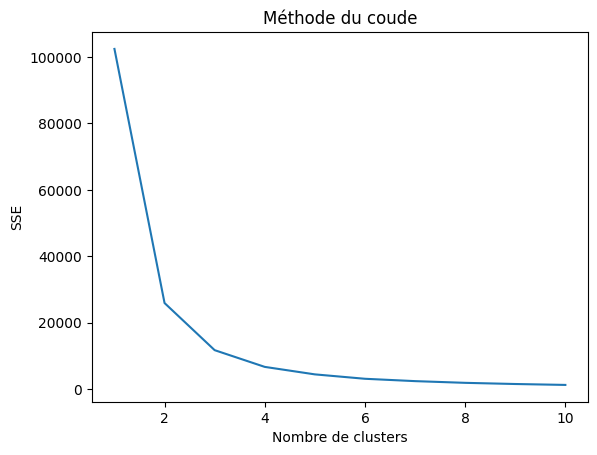

In [33]:
# Utilisez la méthode du coude pour trouver le nombre optimal de clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('SSE')
plt.show()

In [40]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

df['Cluster'] = kmeans.labels_

for cluster in df['Cluster'].unique():
    print(f"Caractéristiques du cluster {cluster}:")
    print(df[df['Cluster'] == cluster].describe())


Caractéristiques du cluster 3:
       ID client        âge  revenu annuel  score de dépenses  Cluster
count  26.000000  26.000000      26.000000          26.000000     26.0
mean   13.500000  -0.572031      -0.569237          -0.449382      3.0
std     7.648529   0.530979       0.599995           0.974213      0.0
min     1.000000  -1.387478      -1.509865          -2.497969      3.0
25%     7.250000  -0.985378      -1.063897          -1.204758      3.0
50%    13.500000  -0.583278      -0.531612          -0.167346      3.0
75%    19.750000  -0.229918      -0.200733           0.216354      3.0
max    26.000000   0.610837       0.561729           0.912699      3.0
Caractéristiques du cluster 1:
       ID client        âge  revenu annuel  score de dépenses  Cluster
count  27.000000  27.000000      27.000000          27.000000     27.0
mean   40.000000   1.101841       1.009295           0.670584      1.0
std     7.937254   1.034265       0.991454           0.591711      0.0
min    27.00000

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


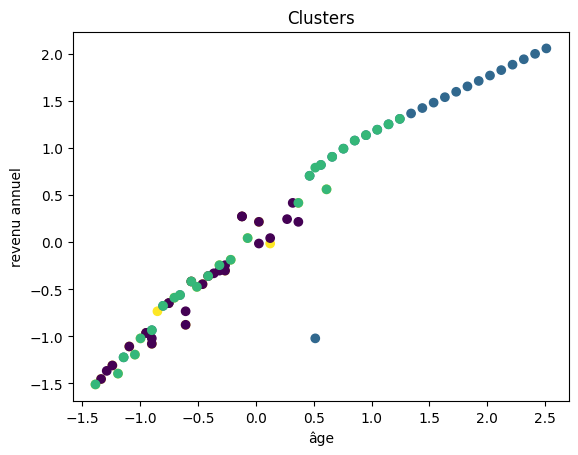

In [41]:
plt.scatter(df['âge'], df['revenu annuel'], c=df['Cluster'])
plt.title('Clusters')
plt.xlabel('âge')
plt.ylabel('revenu annuel')
plt.show()
